# Customer Churn Prediction SystemThis project predicts customer churn using machine learning techniques.


In [54]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/telco_churn.csv")  # because notebook is inside 'notebook/' folder

# Quick look
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
# Drop customerID if exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Convert categorical to numeric
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop('Churn_Yes', axis=1)  # change if your target column name is different
y = df['Churn_Yes']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data ready. Features shape:", X_train.shape)


✅ Data ready. Features shape: (5634, 6559)


In [56]:
from xgboost import XGBClassifier

final_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    eval_metric='logloss',
    use_label_encoder=False
)

final_model.fit(X_train, y_train)
print("✅ Model trained successfully")


C:\Users\SUPER\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:09:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model trained successfully


Accuracy: 0.7977288857345636
ROC-AUC: 0.8397607791469683
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.90      0.87      1035
        True       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



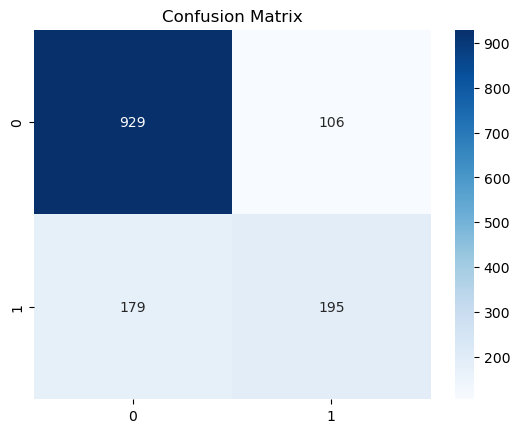

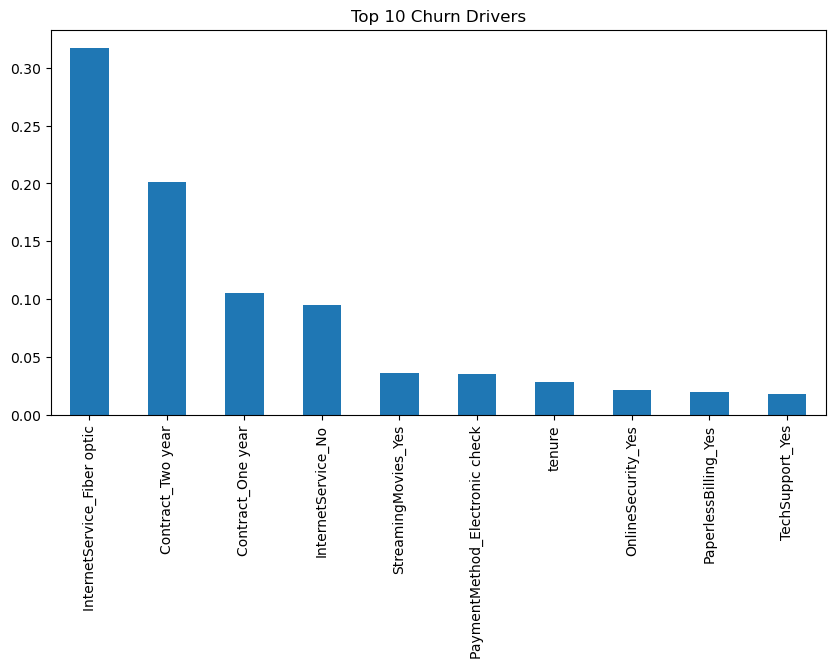

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:,1]

# Accuracy & ROC-AUC
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Feature importance
feature_importance = pd.Series(final_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), title="Top 10 Churn Drivers")
plt.show()


In [62]:
import joblib

# Save model
joblib.dump(final_model, "../churn_model.pkl")

# Save the column names after one-hot encoding
joblib.dump(X.columns.tolist(), "../churn_columns.pkl")




['../churn_columns.pkl']